In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('salary.csv')
df

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,1114,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,1116,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,1117,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,1118,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,34,Private,290763,HS-grad,9,Divorced,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,0
1028,36,Private,51100,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1029,41,Private,227644,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
1030,58,Local-gov,205267,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


In [6]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
#cheak data balance 
df['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [8]:
# Seperating categorical data and numerical data
in_cat = df.select_dtypes(object)
in_num = df.select_dtypes(["float64","int64"])


In [9]:
in_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
1027,34,290763,9,0,0,40,0
1028,36,51100,10,0,0,40,0
1029,41,227644,9,0,0,50,0
1030,58,205267,13,0,0,40,1


In [10]:
in_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
1027,Private,HS-grad,Divorced,Handlers-cleaners,Own-child,White,Female,United-States
1028,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
1029,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
1030,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Wife,White,Female,United-States


In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
for col in in_cat:
    le = LabelEncoder()
    # fit transform generates the classes as well as transforms the data
    in_cat[col] = le.fit_transform(in_cat[col])
    print(col, " : ", le.classes_)
in_cat.head()

Workclass  :  [' Federal-gov' ' Local-gov' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov']
education  :  [' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
marital-status  :  [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
occupation  :  [' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
relationship  :  [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
race  :  [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
sex  :  [' Female' ' Male']
native-country  :  [' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba' ' Do

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [13]:
in_cat

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...
1027,2,11,0,5,3,4,0,28
1028,2,15,2,2,0,4,1,28
1029,2,11,2,13,0,4,1,28
1030,1,9,2,9,5,4,0,28


In [14]:
in_num

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
1027,34,290763,9,0,0,40,0
1028,36,51100,10,0,0,40,0
1029,41,227644,9,0,0,50,0
1030,58,205267,13,0,0,40,1


In [15]:
from scipy.stats import skew


age  :  0.6160534414050984


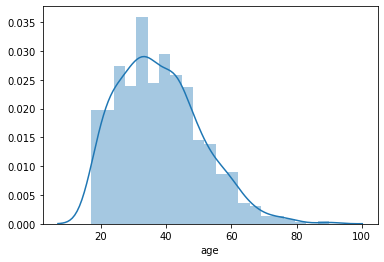

-------------------------------------------------------
fnlwgt  :  1.3937557919747436


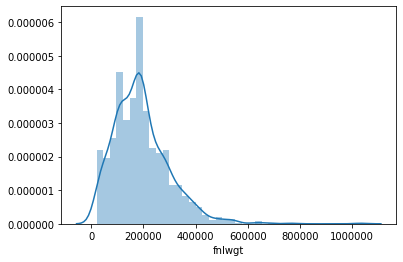

-------------------------------------------------------
education-num  :  -0.30220179407263364


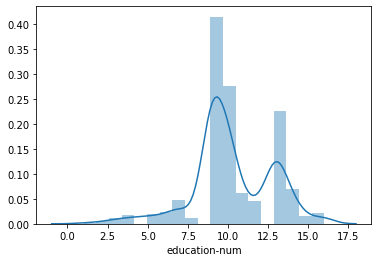

-------------------------------------------------------
capital-gain  :  5.409818233508558


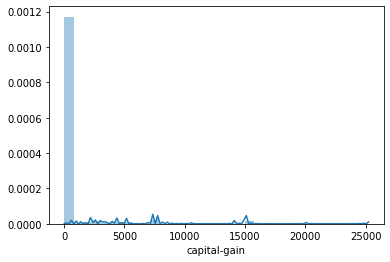

-------------------------------------------------------
capital-loss  :  4.071696903313479


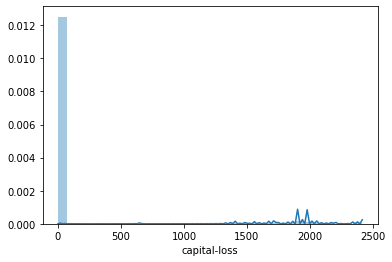

-------------------------------------------------------
hours-per-week  :  0.16318627165535773


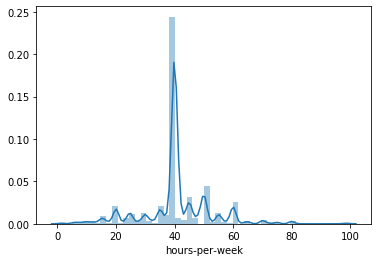

-------------------------------------------------------
Income  :  1.178757937442845


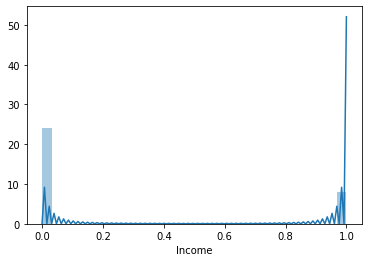

-------------------------------------------------------


In [16]:
for col in in_num:
    try:
        plt.figure()
        print(col, " : ", skew(in_num[col]))
        sns.distplot(in_num[col])
        plt.show()
    except:
        pass
    print("-------------------------------------------------------")

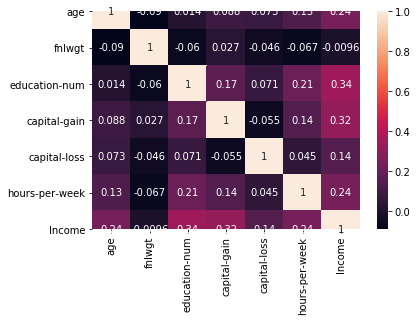

In [17]:
sns.heatmap(in_num.corr(), annot=True)
plt.show()

In [18]:
in_num.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
age,1.000000,-0.090196,0.013707,0.087903,0.073319,0.133313,0.238756
fnlwgt,-0.090196,1.000000,-0.060231,0.027316,-0.045994,-0.066874,-0.009615
education-num,0.013707,-0.060231,1.000000,0.173376,0.071405,0.209285,0.336148
capital-gain,0.087903,0.027316,0.173376,1.000000,-0.055453,0.143795,0.317856
capital-loss,0.073319,-0.045994,0.071405,-0.055453,1.000000,0.045024,0.144675
hours-per-week,0.133313,-0.066874,0.209285,0.143795,0.045024,1.000000,0.240963
Income,0.238756,-0.009615,0.336148,0.317856,0.144675,0.240963,1.000000


In [19]:
in_num.drop('capital-loss',axis=1,inplace=True)


In [20]:
in_num

,age,fnlwgt,education-num,capital-gain,hours-per-week,Income
0,39,77516,13,2174,40,0
1,50,83311,13,0,13,0
2,38,215646,9,0,40,0
3,53,234721,7,0,40,0
4,28,338409,13,0,40,0
...,...,...,...,...,...,...
1027,34,290763,9,0,40,0
1028,36,51100,10,0,40,0
1029,41,227644,9,0,50,0
1030,58,205267,13,0,40,1


In [21]:
in_new = pd.concat([in_num, in_cat], axis=1)
in_new.head()

,age,fnlwgt,education-num,capital-gain,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,40,0,5,9,4,0,1,4,1,28
1,50,83311,13,0,13,0,4,9,2,3,0,4,1,28
2,38,215646,9,0,40,0,2,11,0,5,1,4,1,28
3,53,234721,7,0,40,0,2,1,2,5,0,2,1,28
4,28,338409,13,0,40,0,2,9,2,9,5,2,0,4


In [27]:
in_new['Income'].value_counts()

0    778
1    254
Name: Income, dtype: int64

In [26]:
in_new['Income'].unique()

array([0, 1], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler
# this implement the concept of Standarization
ss = StandardScaler()
#ss.fit_transform(cars_num[["normalized-losses"]])


In [31]:
from sklearn.preprocessing import MinMaxScaler


In [32]:
mm = MinMaxScaler()


In [34]:
in_mx = in_new.copy()
for col in in_mx:
    mx = MinMaxScaler()
    in_mx[col] = mx.fit_transform(in_mx[[col]])
in_mx.head()

,age,fnlwgt,education-num,capital-gain,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0.301370,0.055671,0.800000,0.086147,0.397959,0.0,1.0,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.965517
1,0.452055,0.061397,0.800000,0.000000,0.122449,0.0,0.8,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.965517
2,0.287671,0.192157,0.533333,0.000000,0.397959,0.0,0.4,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.965517
3,0.493151,0.211005,0.400000,0.000000,0.397959,0.0,0.4,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.965517
4,0.150685,0.313458,0.800000,0.000000,0.397959,0.0,0.4,0.600000,0.333333,0.692308,1.0,0.5,0.0,0.137931


In [35]:
from sklearn.preprocessing import StandardScaler
# this implement the concept of Standarization
ss = StandardScaler()

In [36]:
in_ss = in_new.copy()
for col in in_ss:
    ss = StandardScaler()
    in_ss[col] = mx.fit_transform(in_ss[[col]])
in_ss.head()

,age,fnlwgt,education-num,capital-gain,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0.301370,0.055671,0.800000,0.086147,0.397959,0.0,1.0,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.965517
1,0.452055,0.061397,0.800000,0.000000,0.122449,0.0,0.8,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.965517
2,0.287671,0.192157,0.533333,0.000000,0.397959,0.0,0.4,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.965517
3,0.493151,0.211005,0.400000,0.000000,0.397959,0.0,0.4,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.965517
4,0.150685,0.313458,0.800000,0.000000,0.397959,0.0,0.4,0.600000,0.333333,0.692308,1.0,0.5,0.0,0.137931


In [41]:
#train test split
x=in_ss.iloc[:,:-1]
y=in_ss.iloc[:,-9]

In [42]:
x

,age,fnlwgt,education-num,capital-gain,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex
0,0.301370,0.055671,0.800000,0.086147,0.397959,0.0,1.0,0.600000,0.666667,0.000000,0.2,1.00,1.0
1,0.452055,0.061397,0.800000,0.000000,0.122449,0.0,0.8,0.600000,0.333333,0.230769,0.0,1.00,1.0
2,0.287671,0.192157,0.533333,0.000000,0.397959,0.0,0.4,0.733333,0.000000,0.384615,0.2,1.00,1.0
3,0.493151,0.211005,0.400000,0.000000,0.397959,0.0,0.4,0.066667,0.333333,0.384615,0.0,0.50,1.0
4,0.150685,0.313458,0.800000,0.000000,0.397959,0.0,0.4,0.600000,0.333333,0.692308,1.0,0.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,0.232877,0.266380,0.533333,0.000000,0.397959,0.0,0.4,0.733333,0.000000,0.384615,0.6,1.00,0.0
1028,0.260274,0.029570,0.600000,0.000000,0.397959,0.0,0.4,1.000000,0.333333,0.153846,0.0,1.00,1.0
1029,0.328767,0.204012,0.533333,0.000000,0.500000,0.0,0.4,0.733333,0.333333,1.000000,0.0,1.00,1.0
1030,0.561644,0.181901,0.800000,0.000000,0.397959,1.0,0.2,0.600000,0.333333,0.692308,1.0,1.00,0.0


In [43]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1027    0.0
1028    0.0
1029    0.0
1030    1.0
1031    0.0
Name: Income, Length: 1032, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [46]:
#baseline model
from sklearn.linear_model import LogisticRegression

In [47]:
log=LogisticRegression()

In [49]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
log.score(x_test,y_test)

1.0

In [51]:
y_pred=log.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [52]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()

In [54]:
print(tp,fn)
print(fp,tn)

72 0
0 238


In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [57]:
print('accuracy_score',accuracy_score(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('recall_score',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0


In [58]:
# ROC curves are VERY help with understanding the balance 
# between true-positive rate and false positive rates.
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)

In [60]:
print('fpr:',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr: [0. 0. 1.]
tpr [0. 1. 1.]
threshold [2. 1. 0.]


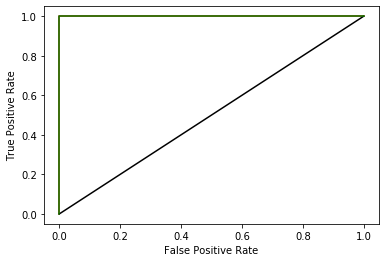

In [61]:
# plotting the ROC curve
plt.plot(fpr, tpr, 'r-')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [62]:
# now we shall analize the performance using AUC
# (Area under curve metrics)
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(auc)

1.0


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       238
         1.0       1.00      1.00      1.00        72

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310

